In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from collections import OrderedDict
from itertools import compress
import scipy.stats

In [2]:

# Read the plate layout file. All plates have identical layouts.
# The plate layout file also includes endpoint OD600 for all 4 plates as measured by the Tecan.
plate_layout = pd.read_csv('../data/validation/plate_layout_20170116.csv',sep=',')


In [3]:
species = ['356']
for specie in species:
            plate_layout[specie] = plate_layout['species'].str.contains(specie)

plate_layout_copy = plate_layout[['well','tecan_OD']]
plate_layout_copy.index = plate_layout_copy['well']
plate_layout_copy.drop(labels='well',inplace=True,axis=1)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# Determine blank value to substract from final tecan reading for each plate.
# Get average of the 4 blanks for each plate.
blanks = plate_layout[plate_layout['species'] == 'Blank']

# for each of the three plates, get the mean blank value
groups = blanks.groupby('plate')
for name, group in groups:
    print(group)
    platemean = group['tecan_OD'].mean()
    plate_layout.loc[plate_layout['plate'] == name, 'tecan_OD'] = \
        plate_layout.loc[plate_layout['plate'] == name,'tecan_OD'] - platemean




    plate well species     media  tecan_OD    356
21      1  B10   Blank  Blank S1    0.0675  False
22      1  B11   Blank  Blank S7    0.0677  False
33      1  C10   Blank  Blank S2    0.0680  False
34      1  C11   Blank  Blank S8    0.0677  False
45      1  D10   Blank  Blank S3    0.0678  False
57      1  E10   Blank  Blank S4    0.0679  False
69      1  F10   Blank  Blank S5    0.0677  False
81      1  G10   Blank  Blank S6    0.0669  False
     plate well species     media  tecan_OD    356
117      2  B10   Blank  Blank S1    0.0660  False
118      2  B11   Blank  Blank S7    0.0668  False
129      2  C10   Blank  Blank S2    0.0683  False
130      2  C11   Blank  Blank S8    0.0676  False
141      2  D10   Blank  Blank S3    0.0692  False
153      2  E10   Blank  Blank S4    0.0694  False
165      2  F10   Blank  Blank S5    0.0683  False
177      2  G10   Blank  Blank S6    0.0698  False
     plate well species     media  tecan_OD    356
213      3  B10   Blank  Blank S1    0.0

In [5]:
plate_layout

,plate,well,species,media,tecan_OD,356
0,1,A1,NaN,NaN,NaN,NaN
1,1,A2,NaN,NaN,NaN,NaN
2,1,A3,NaN,NaN,NaN,NaN
3,1,A4,NaN,NaN,NaN,NaN
4,1,A5,NaN,NaN,NaN,NaN
5,1,A6,NaN,NaN,NaN,NaN
6,1,A7,NaN,NaN,NaN,NaN
7,1,A8,NaN,NaN,NaN,NaN
8,1,A9,NaN,NaN,NaN,NaN
9,1,A10,NaN,NaN,NaN,NaN


In [6]:
# define a multiple testing correction function for endpoint testing
def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

S1
15.0 0.00110617818408
S2
6.0 0.000155795893088
S3
16.0 0.00135394144309
S4
31.0 0.0193733193316
S5
1.0 4.69487256495e-05
S6
45.0 0.12602212177
S7
41.0 0.0782522285262
S8
72.0 0.976909958432
S9
100.0 0.11235119769
S10
60.0 0.506720514878
S11
50.0 0.214493807784
S12
45.0 0.12602212177


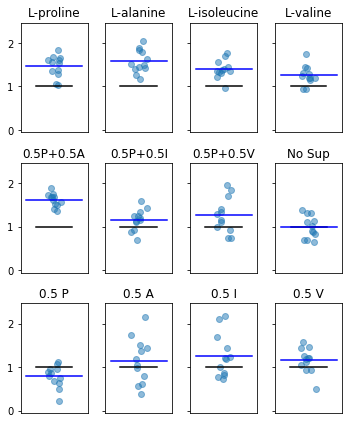

In [7]:
# plot and test endpoint abundance differences fro ASF356
only_356 = plate_layout.loc[plate_layout['species'] == '356']
# get the positive control density
mean356_pos_control = only_356.loc[only_356['media'] == 'S8']['tecan_OD'].mean()
# remove the positive control for plotting
#plotframe = only_356.loc[only_356['media'] != 'S8']

# try with positive control as well
plotframe = only_356.copy()
groups = plotframe.groupby('media',sort=False)
fig, ax = plt.subplots(3,4,sharey=True,figsize=(5,6))
ax = np.ravel(ax)
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groupcount = 0
panelcount = 0
margin = 0.1
lines = []
labels = []
titles = ['L-proline','L-alanine','L-isoleucine','L-valine','0.5P+0.5A',\
          '0.5P+0.5I', '0.5P+0.5V','No Sup', '0.5 P', '0.5 A', '0.5 I', '0.5 V']
pvals = []
for name, group in groups:
    print(name)
    x = [groupcount]*12
    # add jitter
    x = x + np.random.normal(loc=0.0,scale=0.07,size=12)
    y = group['tecan_OD']
    # calculate mann-whitney u-test p value
    (stat,p) = scipy.stats.mannwhitneyu(only_356.loc[only_356['media'] == 'S8']['tecan_OD'],y,alternative="two-sided")
    #(stat,p) = scipy.stats.ttest_ind(only_356.loc[only_356['media'] == 'S9']['tecan_OD'],y)
    pvals.append(p)
    print(stat,p)
    # normalize to percentage for plotting
    y = group['tecan_OD']/mean356_pos_control
    line = ax[panelcount].scatter(x=x,y=y, marker='o',alpha=0.5, label=name)
    lines.append(line)
    
    groupcount+=1
    if groupcount % 1 == 0:
        ax[panelcount].margins(margin)
        ax[panelcount].plot((ax[panelcount].get_xlim()[0]-margin,ax[panelcount].get_xlim()[1]+margin),(1.0,1.0),color='black')
        ax[panelcount].plot((ax[panelcount].get_xlim()[0]-margin,ax[panelcount].get_xlim()[1]+margin),(np.mean(y),np.mean(y)),color='blue')
        ax[panelcount].set_title(titles[panelcount])
        panelcount+=1
    ax[groupcount-1].tick_params(
            axis='x',
            which='both',
            top='off',
            bottom='off',
            labelbottom='off'
        )
#plt.legend(lines,['2.5g/L','0.25g/l'],loc=(1.05,0.5))
fig.subplots_adjust(right=1.6)
plt.tight_layout()
plt.savefig('../results/validation_endpoints_356.svg')

In [8]:
# get the multiple testing corrected p-values for the lower 8 comparisons
p_adjust_bh(pvals[4:])

array([  3.75589805e-04,   2.01635395e-01,   2.01635395e-01,
         9.76909958e-01,   2.01635395e-01,   5.79109160e-01,
         2.85991744e-01,   2.01635395e-01])

In [9]:
# get the multiple testing corrected p-values for the upper 4 comparisons
p_adjust_bh(pvals[0:4])

array([ 0.00180526,  0.00062318,  0.00180526,  0.01937332])

In [10]:
# confirm that significance calls are not impacted based on grouping (e.g. 12 vs. 4 conditions)
p_adjust_bh(pvals)

array([  4.06182433e-03,   9.34775359e-04,   4.06182433e-03,
         4.64959664e-02,   5.63384708e-04,   1.68029496e-01,
         1.56504457e-01,   9.76909958e-01,   1.68029496e-01,
         5.52786016e-01,   2.57392569e-01,   1.68029496e-01])

In [16]:
# calculate percent increase from pro-ala condition for reviewer question
proala_mean = plotframe.loc[plotframe['media'] == 'S5']['tecan_OD'].mean()
nosup_mean = plotframe.loc[plotframe['media'] == 'S8']['tecan_OD'].mean()
percent_increase = proala_mean/nosup_mean
percent_increase

1.6213577134887007